Hii,



  I am a beginner. I tried using all the algorithms on this dataset to check which algorithm is giving more accuracy.As this is a classification problem I used a few of them.
  
  
If you like my notebook please upvote and give me suggestions so that I can improve my skills.


Thanks

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('../input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')

In [126]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [128]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


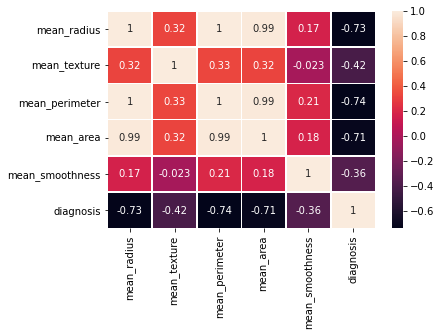

In [117]:
import seaborn as sns
sns.heatmap(df.corr(),annot= True,linewidths=0.5)

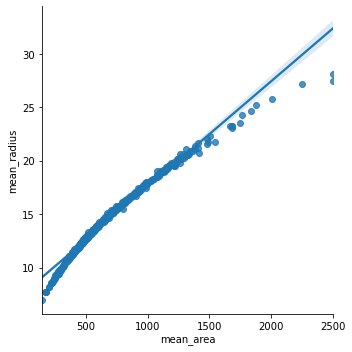

In [118]:
sns.lmplot(x="mean_area",y="mean_radius", data = df)

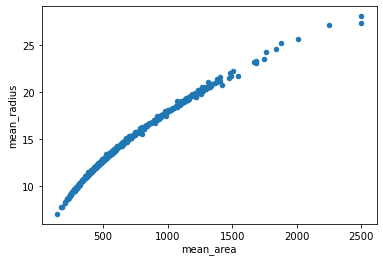

In [120]:
df.plot(kind="scatter",x="mean_area",y="mean_radius")

In [ ]:
X = df.iloc[:,0:-1]

In [ ]:
X

In [ ]:
y =df.iloc[:,-1]

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 0)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
y_test.head()

In [ ]:
y_train.head()

In [122]:
from sklearn.linear_model import LogisticRegression

from  sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import  XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb


lgr = LogisticRegression().fit(X_train,y_train)
dtc = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
rfc = RandomForestClassifier(n_estimators= 250,random_state=0).fit(X_train,y_train)
xgb = XGBClassifier().fit(X_train,y_train)
svm = SVC().fit(X_train,y_train)
gnb = GaussianNB().fit(X_train,y_train)
KNN = KNeighborsClassifier().fit(X_train,y_train)
cat = CatBoostClassifier(iterations=70).fit(X_train,y_train)
lgb = lgb.LGBMClassifier().fit(X_train,y_train)
abc = AdaBoostClassifier(n_estimators=200).fit(X_train,y_train)

Learning rate set to 0.07964
0:	learn: 0.6546184	total: 1.6ms	remaining: 110ms
1:	learn: 0.6206144	total: 3.12ms	remaining: 106ms
2:	learn: 0.5885597	total: 4.96ms	remaining: 111ms
3:	learn: 0.5587261	total: 6.75ms	remaining: 111ms
4:	learn: 0.5323400	total: 8.51ms	remaining: 111ms
5:	learn: 0.5080665	total: 10.3ms	remaining: 110ms
6:	learn: 0.4856892	total: 12.2ms	remaining: 110ms
7:	learn: 0.4661586	total: 14ms	remaining: 109ms
8:	learn: 0.4475515	total: 15.6ms	remaining: 106ms
9:	learn: 0.4296473	total: 17.4ms	remaining: 104ms
10:	learn: 0.4131665	total: 19.2ms	remaining: 103ms
11:	learn: 0.3996739	total: 21.1ms	remaining: 102ms
12:	learn: 0.3868891	total: 23ms	remaining: 101ms
13:	learn: 0.3736382	total: 24.9ms	remaining: 99.8ms
14:	learn: 0.3616982	total: 27ms	remaining: 99.1ms
15:	learn: 0.3503836	total: 29ms	remaining: 97.8ms
16:	learn: 0.3405368	total: 30.9ms	remaining: 96.4ms
17:	learn: 0.3309154	total: 32.6ms	remaining: 94.3ms
18:	learn: 0.3214569	total: 34.8ms	remaining: 93.

In [123]:
lgr_pred = lgr.predict(X_test)
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)
xgb_pred = xgb.predict(X_test)
svm_pred = svm.predict(X_test)
gnb_pred = gnb.predict(X_test)
knn_pred = KNN.predict(X_test)
cat_pred = cat.predict(X_test)
lgb_pred =lgb.predict(X_test)
abc_pred = abc.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score

print("The accuracy is LogisticRegressioin",accuracy_score(y_test,lgr_pred)*100)
print("The accuracy is Tree",accuracy_score(y_test,dtc_pred)*100)
print("The accuracy is RandomForest",accuracy_score(y_test,rfc_pred)*100)
print("The accuracy is XGBoost",accuracy_score(y_test,xgb_pred)*100)
print("The accuracy is SVM",accuracy_score(y_test,svm_pred)*100)
print("The accuracy is Gaussian NB", accuracy_score(y_test,gnb_pred)*100)
print("The accuaracy is KNN", accuracy_score(y_test,knn_pred)*100)
print("The accuracy is Catboost",accuracy_score(y_test,cat_pred)*100)
print("The accuracy is Lightboost",accuracy_score(y_test,lgb_pred)*100)
print("The accuracy is Adaboost",accuracy_score(y_test,abc_pred)*100)

The accuracy is LogisticRegressioin 91.81286549707602
The accuracy is Tree 92.39766081871345
The accuracy is RandomForest 94.15204678362574
The accuracy is XGBoost 93.56725146198829
The accuracy is SVM 87.71929824561403
The accuracy is Gaussian NB 92.98245614035088
The accuaracy is KNN 90.05847953216374
The accuracy is Catboost 94.73684210526315
The accuracy is Lightboost 92.39766081871345
The accuracy is Adaboost 90.64327485380117


**Thus , we are getting high accuracy with catboost Algorithm**